In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [5]:
# TODO : Import the Data from the kaggle API
from google.colab import files
files.upload()

Saving AB_Test_Results_DC.zip to AB_Test_Results_DC (1).zip


{'AB_Test_Results_DC (1).zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00pi;Y\xe5\x0b\xa1\xe9\x9cp\x00\x00\x87\x94\x02\x00#\x00\x00\x00AB_Test_Results/AB_Test_Results.csv\x84\xdd\xb9\xaetK\x93\x1ef\xbf\xaf\xa5\xb1\xb1"#G\x93\x80\xda\xa0!\x1a\x94(\x97 d\t\x10$\x80 t\xfd\xca\xaa\x1fd\xd7z\xa2!\x1d\xef\x14\xf6W\xb5\x86\xcc\xc8\x18\xde\xe1?\xfd/\xff\xf2\x1f\xff\xf3\xbf\xff\x9f\xfe\xf9\x7f\xfbw\xff\xf1\xdf\xff\xbb\xff\xf0\xbf\xfe\xe7\xff\xf0\xef\xfe\xe7\x7f\xf9\xe7\xff\xf8/\xff\xdb\xbf\xfc\x87\xff\xf4/\xff\xb4r\xfd\xf3\xff\xf3_\xfe\xeb\xff\xf1_\xfe\xaf\xff\xf6\xcf\xcf\xdf\xf3O\xad\xb7\xfc\xe7\xff\xfd\xff\xfe\xbf\xfe\xdb\x7f\xfd\xbf\xff\xcf\xef\x07\xa7G\xbc>X\xc9\x073V\x7f\x7fG\xee\xe7\xfd\xc1\xee\xe7\xfd\xa51\xf7\xfb;\xda3^\xffd\x8d\xfe\xfe\x8b\x9dg\xbc>\x88\xd8\xfd}a1\xdf\x7f\xd1F;\xff\xe3K\xdb_\x8c\x7f\xca\xbe\xcf\xebgv\x7f\xa6\xbf\xfb\xfe\x8b\xf3\xec\xf7\x95\xf5\xb1\xda\xfb;N{?\xc3\xcc\x9d\xaf\x0f\xe6\xd8\xfb\xfdAk\xef\x9f\xed\x8d\x1fY\xfc\xc88\xefo\xc8\x19<\xf49\xd7\xeb\xee3\xc6\xfbM\xae3x\x9

In [6]:
!unzip AB_Test_Results_DC.zip

Archive:  AB_Test_Results_DC.zip
  inflating: AB_Test_Results/AB_Test_Results.csv  


In [7]:
df = pd.read_csv("/content/AB_Test_Results/AB_Test_Results.csv")

In [8]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


# Data Understanding

In [ ]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [10]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [11]:
df.isnull().sum()

,0
USER_ID,0
VARIANT_NAME,0
REVENUE,0


In [12]:
df["VARIANT_NAME"].value_counts()

,count
VARIANT_NAME,
variant,5016
control,4984


In [13]:
df['USER_ID'].nunique()

6324

# Average Revenue by VARIANT_NAME

In [15]:
#TODO
average_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean()
average_revenue

,REVENUE
VARIANT_NAME,
control,0.129013
variant,0.070070


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [19]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?

control_group = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_group = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

shapiro_test_control = shapiro(control_group)
shapiro_test_variant = shapiro(variant_group)

print("Shapiro-Wilk Test for Control Group:", shapiro_test_control)


print("Shapiro-Wilk Test for Variant Group:", shapiro_test_variant)


Shapiro-Wilk Test for Control Group: ShapiroResult(statistic=0.01833147442513483, pvalue=2.4983285100057203e-95)
Shapiro-Wilk Test for Variant Group: ShapiroResult(statistic=0.027033073451830147, pvalue=2.7310104028899288e-95)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


The results of the Shapiro-Wilk test show that the data in both groups  do not correspond to a normal distribution, because
The p-value in both cases is significantly less
than 0.05

In [20]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

#H0 : The variances in the groups are equal (homogeneity of variances).
#H1 : The variances in the groups vary.


levene_test = levene(control_group, variant_group)

print("Levene's Test:", levene_test)

Levene's Test: LeveneResult(statistic=1.6158565214488871, pvalue=0.2037000785338918)


We cannot reject the null hypothesis.

# Non-Parametric Test (mannwhitneyu Test)

In [21]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?
#H0 The income distributions in the Control and Variant groups are the same
#H1 Income distributions in the groups vary

mannwhitneyu_test = mannwhitneyu(control_group, variant_group)

print("Mann-Whitney U Test:", mannwhitneyu_test)

Mann-Whitney U Test: MannwhitneyuResult(statistic=12521564.0, pvalue=0.47825247965294926)


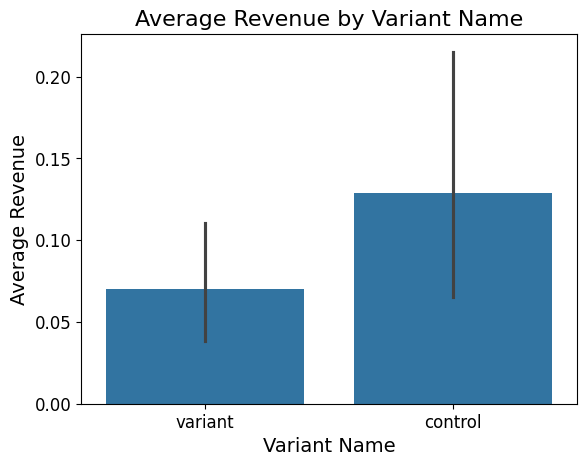

In [29]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

sns.barplot(x='VARIANT_NAME', y='REVENUE', data=df)
plt.title('Average Revenue by Variant Name', fontsize=16)
plt.xlabel('Variant Name', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-30-063f4ac21160>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_revenue, x='VARIANT_NAME', y='REVENUE', ci=None)


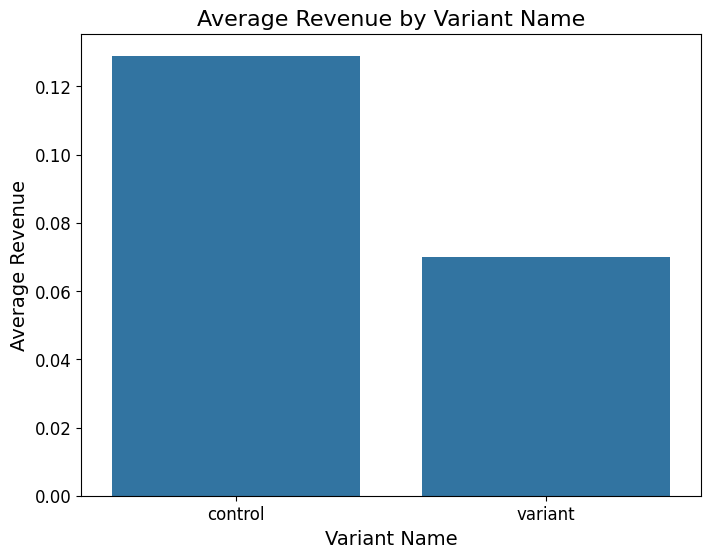

In [30]:
avg_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(data=avg_revenue, x='VARIANT_NAME', y='REVENUE', ci=None)

plt.title('Average Revenue by Variant Name', fontsize=16)
plt.xlabel('Variant Name', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()